In [1]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [4]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


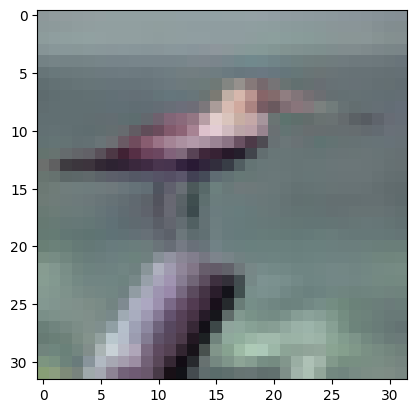

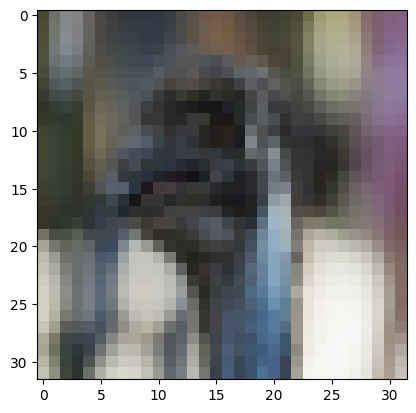

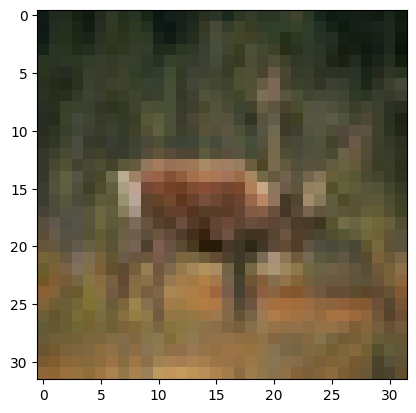

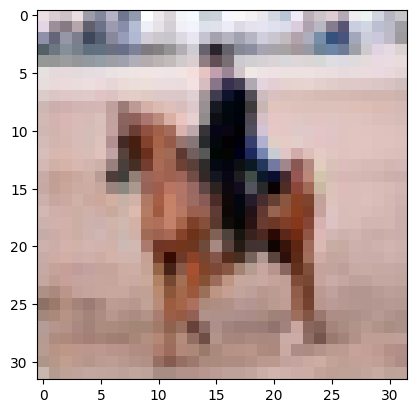

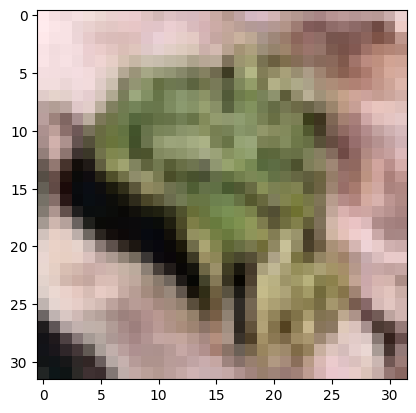

In [5]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [6]:
from tensorflow import keras
from keras import layers
from keras import models
#inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# experimentar com 224, 224
x = layers.Resizing(100, 100)(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#image size too sort to add another layer
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
#outputs = layers.Dense(10, activation="sigmoid")(x)
#softmax is used for multi-class classification
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 100, 100, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                             

TESTING DIFERENT OTIMIZERS:

1 - RMSprop

In [8]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])


In [9]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 86s 69ms/step - loss: 1.6710 - acc: 0.3970 - val_loss: 1.4056 - val_acc: 0.5059
Epoch 2/30
1252/1252 [==============================] - 87s 69ms/step - loss: 1.3007 - acc: 0.5402 - val_loss: 1.2733 - val_acc: 0.5462
Epoch 3/30
1252/1252 [==============================] - 89s 71ms/step - loss: 1.1399 - acc: 0.5981 - val_loss: 1.1456 - val_acc: 0.5975
Epoch 4/30
1252/1252 [==============================] - 89s 71ms/step - loss: 1.0219 - acc: 0.6442 - val_loss: 1.0520 - val_acc: 0.6348
Epoch 5/30
1252/1252 [==============================] - 86s 69ms/step - loss: 0.9224 - acc: 0.6797 - val_loss: 1.1332 - val_acc: 0.6155
Epoch 6/30
1252/1252 [==============================] - 88s 70ms/step - loss: 0.8309 - acc: 0.7127 - val_loss: 1.1592 - val_acc: 0.6035
Epoch 7/30
1252/1252 [==============================] - 89s 71ms/step - loss: 0.7384 - acc: 0.7466 - val_loss: 1.0486 - val_acc: 0.6516
Epoch 8/30
1252/1252 [==========================

RESULTS:

For RMSdrop optimizer -> loss: 0.5891 - acc: 0.8002 - val_loss: 0.9696 - val_acc: 0.6834

After img resizing: loss: 0.0110 - acc: 0.9967 - val_loss: 2.8857 - val_acc: 0.6902

TESTING DIFERENT OTIMIZERS:

2 - ADAM

In [10]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['acc'])


In [11]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 82s 65ms/step - loss: 0.7914 - acc: 0.7396 - val_loss: 1.1005 - val_acc: 0.6375
Epoch 2/30
1252/1252 [==============================] - 83s 66ms/step - loss: 0.4608 - acc: 0.8378 - val_loss: 1.2380 - val_acc: 0.6526
Epoch 3/30
1252/1252 [==============================] - 85s 68ms/step - loss: 0.2986 - acc: 0.8960 - val_loss: 1.4163 - val_acc: 0.6494
Epoch 4/30
1252/1252 [==============================] - 172s 137ms/step - loss: 0.2167 - acc: 0.9259 - val_loss: 1.4512 - val_acc: 0.6663
Epoch 5/30
1252/1252 [==============================] - 175s 140ms/step - loss: 0.1711 - acc: 0.9411 - val_loss: 1.6405 - val_acc: 0.6705
Epoch 6/30
1252/1252 [==============================] - 203s 162ms/step - loss: 0.1359 - acc: 0.9535 - val_loss: 1.6772 - val_acc: 0.6669
Epoch 7/30
1252/1252 [==============================] - 233s 186ms/step - loss: 0.1155 - acc: 0.9620 - val_loss: 1.7755 - val_acc: 0.6720
Epoch 8/30
1252/1252 [==================

KeyboardInterrupt: 

RESULTS:
For ADAM optimizer -> loss: 0.0909 - acc: 0.9695 - val_loss: 2.7220 - val_acc: 0.6886
